## Cluster the Olivetti Faces Dataset with K-Means


For this week exercise we will try to cluster human pictures, in order to identify which picture belong to the same subject/person. 
We will use an unsupervised learning approach, which means we will train without knowing the correct assignment of the pictures (in other words the person have no labels).
As usual, answer the questions/comments and add your code where indicated. Otherwise just try to understand what's happening :)

About the database: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each). Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.
For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
olivetti = fetch_olivetti_faces()
#this cell imports the dataset 

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/erxhanganiu/scikit_learn_data


In [2]:
#print(olivetti.DESCR) #uncomment this line if you want to know more about the dataset
X = olivetti.data #X is our data matrix

Since the images are 64x64pixels, the number of features (=number of total pixels) is 4096. This a huge number of variables to check out for clustering. So, for convenience we should first try to see if we can reduce the number of features we feed to K-Means. This operation is called "Dimensionality Reduction" and it is the subject of next week class. 
For the time being just run the next cell without much worries and we will get back to it. 

In [3]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(olivetti.data)
pca.n_components_

260

In [4]:
print(X)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


Well done :) we reduce dimensionality quite a lot!

Let's now perform K-Means on this subset of features: X_pca
Use the function https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
and the advices given in the class.  

Remember that you have to define K, the number of clusters.

How to set K? Start with a "reasonable" guess and qualitatively look how good the clustering is. 
Try to change K manually and see if it improves or get worse.

/Users/erxhanganiu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0


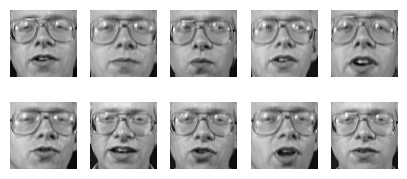

Cluster 1


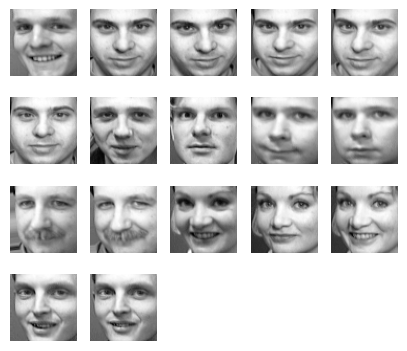

Cluster 2


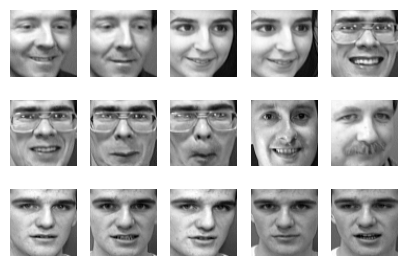

Cluster 3


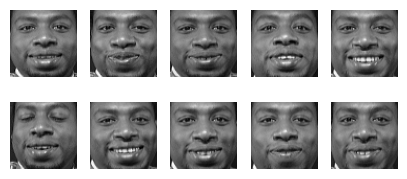

Cluster 4


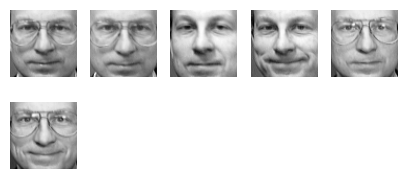

Cluster 5


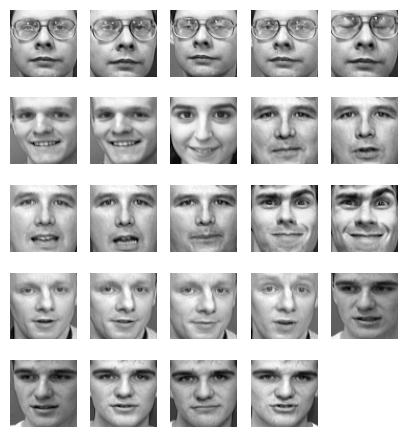

Cluster 6


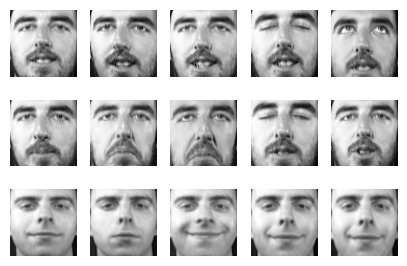

Cluster 7


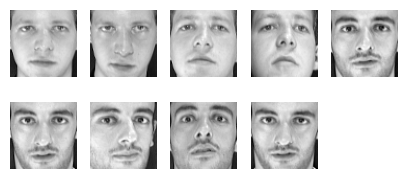

Cluster 8


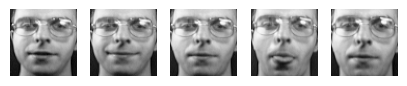

Cluster 9


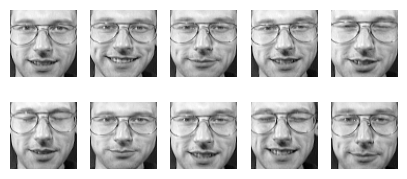

Cluster 10


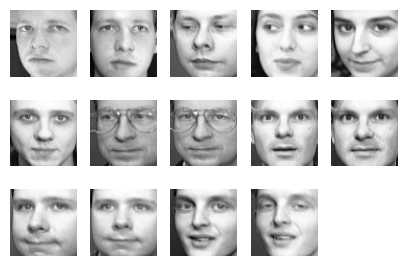

Cluster 11


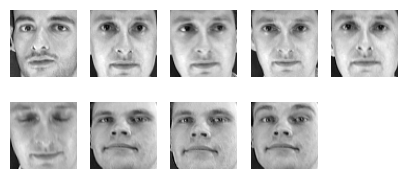

Cluster 12


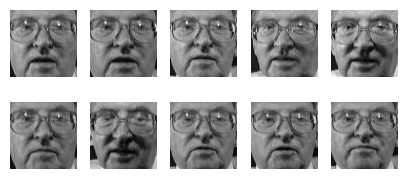

Cluster 13


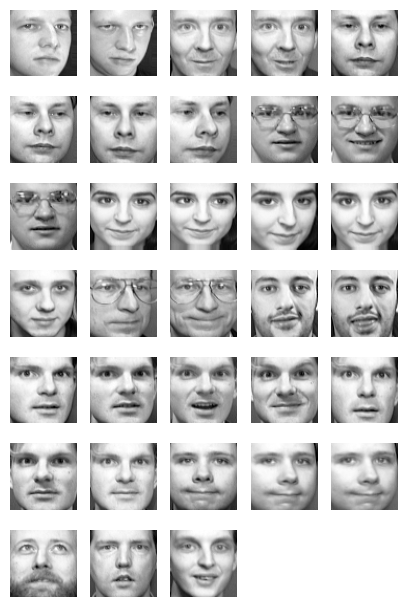

Cluster 14


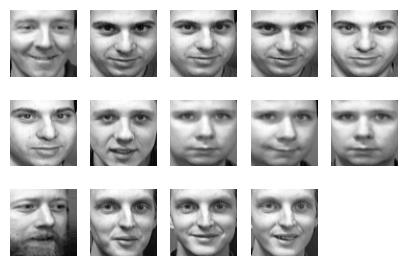

Cluster 15


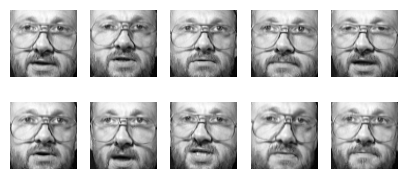

Cluster 16


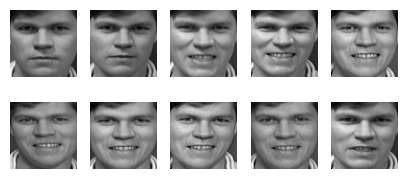

Cluster 17


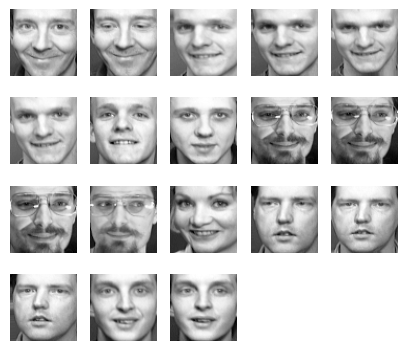

Cluster 18


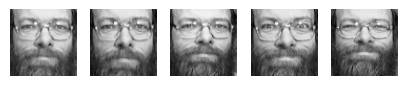

Cluster 19


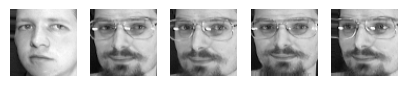

Cluster 20


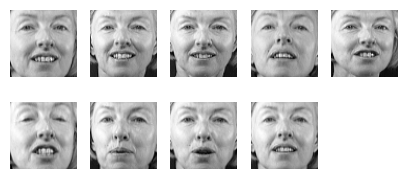

Cluster 21


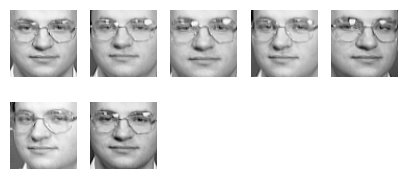

Cluster 22


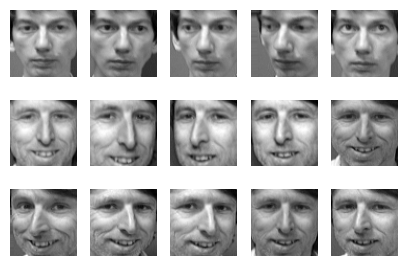

Cluster 23


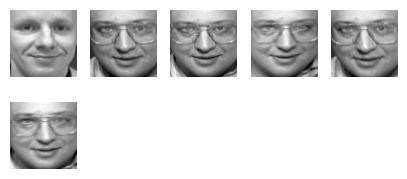

Cluster 24


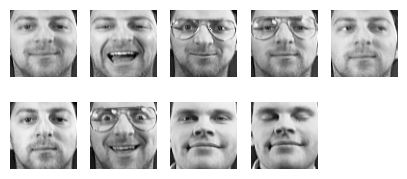

Cluster 25


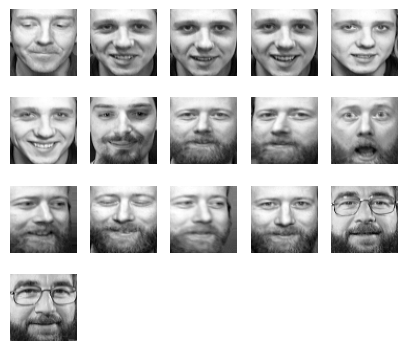

Cluster 26


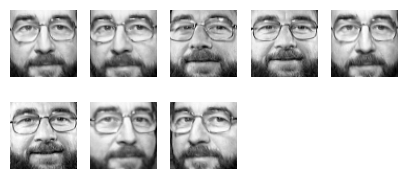

Cluster 27


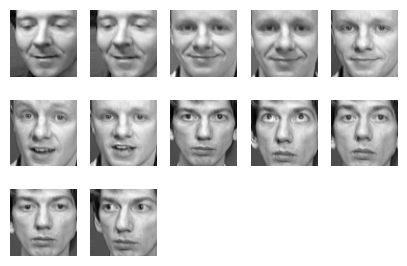

Cluster 28


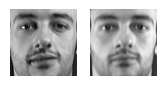

Cluster 29


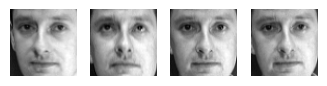

Cluster 30


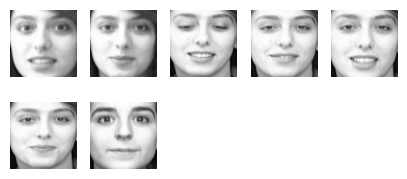

Cluster 31


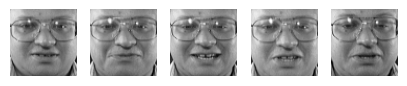

Cluster 32


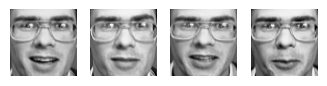

Cluster 33


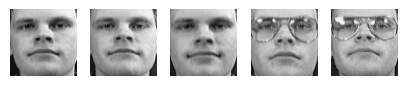

Cluster 34


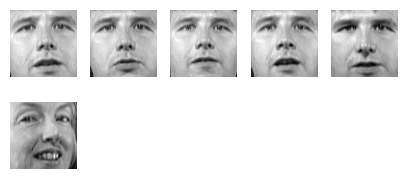

Cluster 35


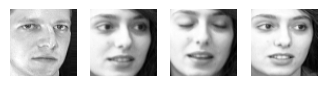

Cluster 36


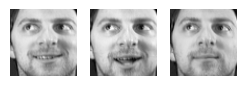

Cluster 37


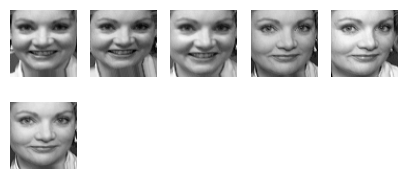

Cluster 38


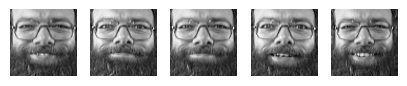

Cluster 39


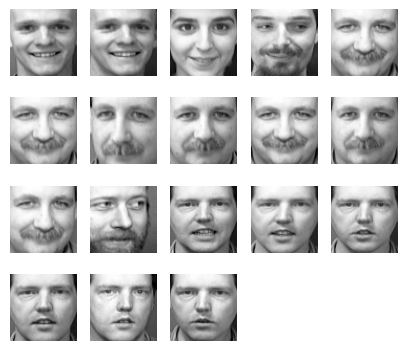

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=40)### ADD YOUR CODE HERE ####
kmeans.fit(X_pca)

def plot_faces(faces, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, face in enumerate(faces):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
    plt.show()

for cluster_id in np.unique(kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans.labels_==cluster_id
    faces = X[in_cluster].reshape(-1, 64, 64)
    plot_faces(faces)

What was your best K?

For a serious approach we should try to identify K through a more robust approach. 
Let's run the K-Means algorithm in a loop, every time with a different number of clusters, K. 

In [ ]:
k_range = range(5, 150, 5)# feel free to change the range limits or step
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = #### ADD YOUR CODE HERE
    kmeans.fit(X_pca)
    kmeans_per_k.append(kmeans)

Let's now evaluate for each of this run the inertia of the model. Luckily, this is part of the Sklearn KMeans function's output (Z.B. kmeans.inertia_) 

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Can you get from this plot a clear indication on what could be a good value for K?
Do you see an "elbow"?

Let's try with the more sophisticated method called silhouette method.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

What is the best value for K according to this method?

In [ ]:
best_k

It looks like the best number of clusters is quite high. 
How does it compare with your first reasonable guess? 

Let's have a direct look of how pictures are grouped according to the best k

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=#add value of best K here#)
kmeans.fit(X_pca)

In [ ]:
def plot_faces(faces, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, face in enumerate(faces):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
    plt.show()

for cluster_id in np.unique(kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans.labels_==cluster_id
    faces = X[in_cluster].reshape(-1, 64, 64)
    plot_faces(faces)